# 1. Earth System Data Cube (ESDC) Playground
### Duration: 15 min
---

This notebook is divided as follows:

1. Introduction to the ESDC.
2. Loading the ESDC as a lazy array.
3. Loading a slice of a variable in memory.
4. Analyzing a variable using parallel computing.

## Introduction to the ESDC

The Earth System Data Cube (ESDC) is a global data cube created by [Mahecha et al., (2020)](https://doi.org/10.5194/esd-11-201-2020
) for the Earth System Data Lab (ESDL) project.

Here there is a visualization of the ESDC presented in the paper ["Mahecha, M. D., et al.: Earth system data cubes unravel global multivariate dynamics, Earth Syst. Dynam., 11, 201–234, https://doi.org/10.5194/esd-11-201-2020, 2020."](https://doi.org/10.5194/esd-11-201-2020):

<img src="https://esd.copernicus.org/articles/11/201/2020/esd-11-201-2020-avatar-web.png" alt="ESDC" width="500"/>

In 2022 the ESDC was updated to v3.0.2 as part of the DeepESDL, including new variables of interest and extending the time span until the end of 2020.

The complete details of the new ESDC can be found at the [DeepESDL ESDC Documentation](https://deepesdl.readthedocs.io/en/latest/datasets/ESDC/).

## Import `xarray`

[`xarray` is a robust Python library](https://docs.xarray.dev/en/stable/) for managing and working with labeled multisimensional arrays. So, it its perfect for managing Earth System Data Cubes!

In [1]:
import xarray as xr

## Load the ESDC (But not in memory, it's too big!)

The ESDC is stored as a [`zarr` file](https://zarr.dev/). These files are cloud-ready formats that allow us to save chunked multidimensional arrays.

In [2]:
esdc = xr.open_zarr("http://data.rsc4earth.de/EarthSystemDataCube/v3.0.2/esdc-8d-0.25deg-256x128x128-3.0.2.zarr")
esdc

<xarray.Dataset> Size: 345GB
Dimensions:                            (time: 1978, lat: 720, lon: 1440)
Coordinates:
  * lat                                (lat) float64 6kB -89.88 -89.62 ... 89.88
  * lon                                (lon) float64 12kB -179.9 ... 179.9
  * time                               (time) datetime64[ns] 16kB 1979-01-05 ...
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    cot                                (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    cth                                (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 8GB dask.array<chunksize=(256, 128, 128), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

## Load a slice of the ESDC in memory

Let's first select a slice of one of the variables: `air_temperature_2m`.

Note that we first defined the variable of interest and then we selected one date to get a slice in time.

> Also note that the defined date is not part of the time coordinates, so we select the nearest one using `method="nearest"`.

In [6]:
air_temperature = esdc["air_temperature_2m"]
air_temperature_mid2020 = air_temperature.sel(time="2020-06-01",method = "nearest")
air_temperature_mid2020

<xarray.DataArray 'air_temperature_2m' (lat: 720, lon: 1440)> Size: 4MB
dask.array<getitem, shape=(720, 1440), dtype=float32, chunksize=(128, 128), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    time     datetime64[ns] 8B 2020-06-05
Attributes: (12/25)
    acknowledgment:             ERA5 hourly data on single levels from 1959 t...
    date_modified:              2022-11-04 15:41:36.233472
    description:                ERA5 Reanalysis Products
    geospatial_lat_max:         89.875
    geospatial_lat_min:         -89.875
    geospatial_lat_resolution:  0.25
    ...                         ...
    standard_name:              mean_air_temperature_2m
    temporal_resolution:        8D
    time_coverage_end:          2021-12-27T00:00:00.000000000
    time_coverage_start:        1979-01-01T00:00:00.000000000
    time_period:                8D
    units:                      °C

Let's import one helper function from `dask` so we have a nice progress bar:

In [7]:
from dask.diagnostics import ProgressBar

Now, with the method `compute()` we can load our slice to memory:

In [9]:
with ProgressBar():
    air_temperature_mid2020 = air_temperature_mid2020.compute()

[########################################] | 100% Completed | 5.25 ss


Now we can see the ACTUAL data values:

In [11]:
air_temperature_mid2020

<xarray.DataArray 'air_temperature_2m' (lat: 720, lon: 1440)> Size: 4MB
array([[-44.289803  , -44.289474  , -44.289127  , ..., -44.2909    ,
        -44.290558  , -44.29017   ],
       [-44.349293  , -44.348255  , -44.347218  , ..., -44.352516  ,
        -44.35143   , -44.35036   ],
       [-44.26647   , -44.26477   , -44.26326   , ..., -44.27397   ,
        -44.2705    , -44.26825   ],
       ...,
       [  0.30903244,   0.30935097,   0.3095255 , ...,   0.30822086,
          0.30835247,   0.30864525],
       [  0.33401966,   0.3342409 ,   0.33446598, ...,   0.33333397,
          0.3335619 ,   0.3337717 ],
       [  0.36592388,   0.36601257,   0.36609364, ...,   0.36569118,
          0.36578083,   0.36584473]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    time     datetime64[ns] 8B 2020-06-05
Attributes: (12/25)
    acknowledgment:             ERA5 hourly data on single levels from 1959 t...
    date_modified:              2022-11-04 15:41:36.233472
    description:                ERA5 Reanalysis Products
    geospatial_lat_max:         89.875
    geospatial_lat_min:         -89.875
    geospatial_lat_resolution:  0.25
    ...                         ...
    standard_name:              mean_air_temperature_2m
    temporal_resolution:        8D
    time_coverage_end:          2021-12-27T00:00:00.000000000
    time_coverage_start:        1979-01-01T00:00:00.000000000
    time_period:                8D
    units:                      °C

We can plot it to see it nicely!

> Note: We can also do this without loading manually to memory, but then it will be done each time we run the plotting process!

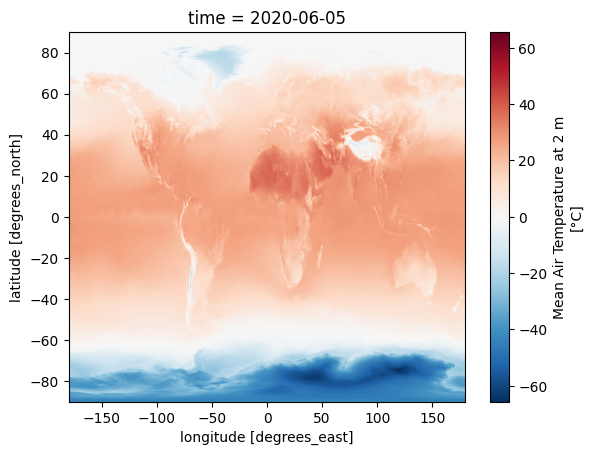

In [12]:
air_temperature_mid2020.plot.imshow()

## Analyzing the data

Let's say we want to get the median Gross Primary Prodiction (GPP) of Estonia from 2000 to 2020. How do we do it?

First we select our variable of interest: `gross_primary_productivity`.

Then we have to slice our data cube to match the bounding box of Estonia (I didn't know the coords beforehand, so I asked chatGPT)

<img src="gpt4o-estonia-bbox.jpg" alt="chatGPTbbox" width="700"/>

In [27]:
gpp = esdc["gross_primary_productivity"]
gpp_estonia = gpp.sel(
    time = slice("2001-01-01","2020-12-31"),
    lat = slice(57.5,59.9),
    lon = slice(21.8,28.2)
)

Now, we can compute our median GPP value per time step, so we can get a time series of median GPP.

> Note that it will be computed in parallel using `dask`!

In [29]:
with ProgressBar():
    gpp_estonia_median = gpp_estonia.median(["lat","lon"]).compute()

[########################################] | 100% Completed | 605.16 ms


Now we can plot the time series.

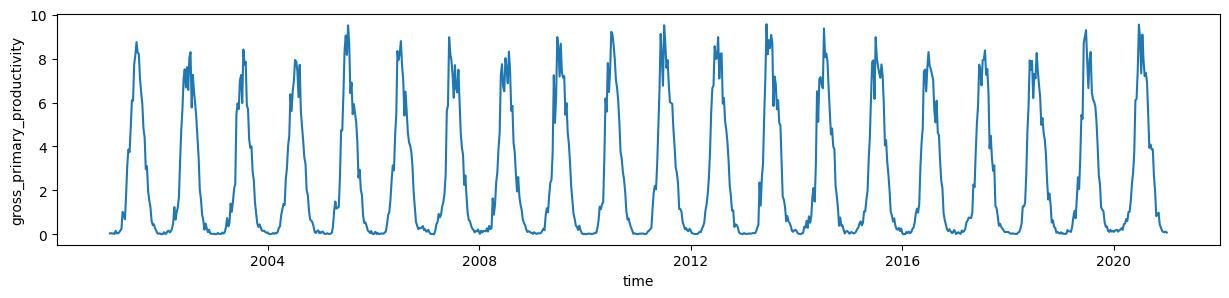

In [33]:
gpp_estonia_median.plot(figsize=(15,3))